Размерность набора данных: (1372, 5)

Первые 5 строк:
   variance  skewness  curtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0

Accuracy (доля правильных предсказаний): 0.9782

Полный отчёт classification_report:
              precision    recall  f1-score   support

           0     1.0000    0.9607    0.9800       229
           1     0.9531    1.0000    0.9760       183

    accuracy                         0.9782       412
   macro avg     0.9766    0.9803    0.9780       412
weighted avg     0.9792    0.9782    0.9782       412


Confusion Matrix (матрица ошибок):
 [[220   9]
 [  0 183]]


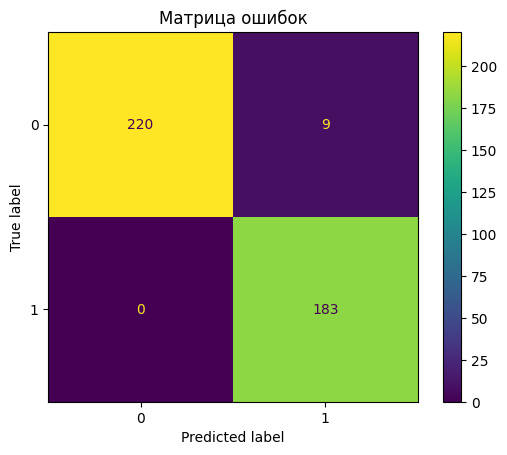

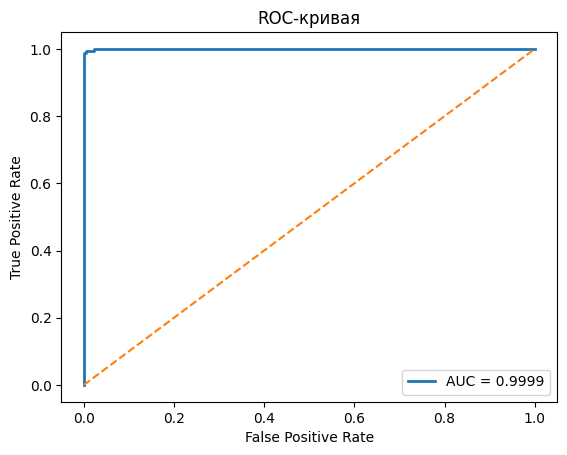

In [ ]:
# Лабораторная работа № 4 — Логистическая регрессия
# обучить модель логистической регрессии на датасете Banknote Authentication и оценить её качество.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    auc,
)


url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt"

# Задаём имена столбцов согласно описанию набора данных
col_names = ["variance", "skewness", "curtosis", "entropy", "class"]

data = pd.read_csv(url, header=None, names=col_names)

print("Размерность набора данных:", data.shape)
print("\nПервые 5 строк:")
print(data.head())

# Отделяем признаки (X) и целевую переменную (y)
X = data.drop("class", axis=1)
y = data["class"]

# Делим данные на обучающую и тестовую подвыборки
#   test_size=0.3  → 30 % данных пойдут в тест
#   random_state   → фиксируем «случайность» для повторяемости эксперимента
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Логистическая регрессия чувствительна к масштабам признаков, поэтому
# применяем стандартизацию (z‑score)
scaler = StandardScaler()
# fit  «учится» на обучающих данных, transform  масштабирует
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# C (regularization strength) оставим по умолчанию (=1.0),
# max_iter увеличиваем до 1000, чтобы гарантировать сходимость
model = LogisticRegression(max_iter=1000, solver="lbfgs")
model.fit(X_train_scaled, y_train)


y_pred = model.predict(X_test_scaled)

print("\nAccuracy (доля правильных предсказаний):",
      round(accuracy_score(y_test, y_pred), 4))

print("\nПолный отчёт classification_report:")
print(classification_report(y_test, y_pred, digits=4))

# -------- Confusion Matrix (матрица ошибок) ------------------------------
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix (матрица ошибок):\n", cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()
plt.title("Матрица ошибок")
plt.show()

# -------- ROC‑кривая и AUC ------------------------------------------------
# Для бинарной задачи достаточно вероятностей положительного класса
y_prob = model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, linewidth=2, label=f"AUC = {roc_auc:.4f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC‑кривая")
plt.legend()
plt.show()

